Importamos librerias necesarias 

In [201]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport as pr
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


leemos los archivos

In [202]:

hechos_homicidios=pd.read_excel('hechos_homicidios.xlsx',sheet_name='HECHOS')
victimas_homicidios=pd.read_excel('victimas_homicidios.xlsx',sheet_name='VICTIMAS')

In [203]:
hechos_homicidios.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


verificamos tipo de datos por cada tabla

In [204]:
hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [205]:
victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


cambiamos el nombre de la columna id_hecho para hacer un inner y trabajar de manera mas optima en una sola tabla 

In [206]:
victimas_homicidios=victimas_homicidios.rename(columns={'ID_hecho':'ID'})

In [207]:
victimas_homicidios

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [208]:
df_combinado = hechos_homicidios.merge(victimas_homicidios, on='ID', how='inner')

para tener mayor rendimiento en el proceso se realiza un inner

In [209]:
df_combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,AUTO,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,AUTO,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,CARGAS,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,CARGAS,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


verificamos que columnas son iguales y se elimminan

In [210]:
import pandas as pd

def encontrar_columnas_diferentes(df):
    columnas_diferentes = []
    columnas_iguales = []

    for columna1 in df.columns:
        for columna2 in df.columns:
            if columna1 != columna2:
                if (df[columna1] == df[columna2]).all():
                    columnas_iguales.append((columna1, columna2))
                elif not (df[columna1] == df[columna2]).all():
                    columnas_diferentes.append((columna1, columna2))

    return columnas_iguales, columnas_diferentes


columnas_iguales, columnas_diferentes = encontrar_columnas_diferentes(df_combinado[df_combinado.columns])

print("Pares de columnas iguales:")
for columna1, columna2 in columnas_iguales:
    print(f"{columna1} y {columna2} son iguales")



Pares de columnas iguales:
AAAA_x y AAAA_y son iguales
MM_x y MM_y son iguales
AAAA_y y AAAA_x son iguales
MM_y y MM_x son iguales


In [211]:

# Eliminar la columna 'AAAA_y','MM_y'
combinado = df_combinado.drop(['AAAA_y','MM_y'],axis=1)


verificamos por que las columnas fecah ,dia y victimas no son iguales 

In [212]:
indices=[]
for index, row  in combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['FECHA_x'] !=row['FECHA_y']:
        indices.append(index)


    if row['DD_x'] !=row['DD_y']:
        indices.append(index)
    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)


In [213]:
indices

[65, 204, 204, 237, 238, 602, 603]

se puede concluir que la columna de fecha_Y de victimas tiene la misma fecha de fallecimiento por lo tanto se eliminara

In [214]:
combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,FECHA_y,DD_x,DD_y,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,2016-07-03,3,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,2017-05-29,24,29,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,2020-12-05,5,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,2020-12-05,5,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [215]:
combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,PARTICIPANTES,VICTIMA_x,ACUSADO,FECHA_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2016-01-01,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2016-01-03,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,MOTO-SD,MOTO,SD,2016-01-10,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOTO-AUTO,MOTO,AUTO,2021-12-13,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,MOTO-AUTO,MOTO,AUTO,2021-12-20,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,MOTO-CARGAS,MOTO,CARGAS,2021-12-30,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,AUTO-CARGAS,AUTO,CARGAS,2021-12-15,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [216]:
# Eliminar la columna 'AAAA_y','MM_y'
combinado = combinado.drop(['DD_y','FECHA_y' ],axis=1)


verificamos que hay un valor atipico en la columna victima_x donde dice que es objeto fijo lo cual no es congruente, con esto podemos deducir que pertenece ese valor a la columna acusado y se hara el cambio

In [217]:
combinado[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
238,2017-09-02,2,OBJETO FIJO,AUTO,2017-09-02 00:00:00,AUTO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


In [218]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'combinado'

# Encuentra las filas donde 'VICTIMA_x' es igual a 'OBJETO FIJO'
filas_objeto_fijo = combinado['VICTIMA_x'] == 'OBJETO FIJO'

# Almacena temporalmente los valores de 'VICTIMA_x' en una columna temporal
combinado.loc[filas_objeto_fijo, 'TEMP'] = combinado.loc[filas_objeto_fijo, 'VICTIMA_x']

# Intercambia los valores entre 'VICTIMA_x' y 'ACUSADO'
combinado.loc[filas_objeto_fijo, 'VICTIMA_x'] = combinado.loc[filas_objeto_fijo, 'ACUSADO']
combinado.loc[filas_objeto_fijo, 'ACUSADO'] = combinado.loc[filas_objeto_fijo, 'TEMP']

# Elimina la columna temporal 'TEMP'
combinado.drop(columns=['TEMP'], inplace=True)


In [219]:
combinado[['FECHA_x', 'DD_x', 'VICTIMA_x',  'VICTIMA_y','FECHA_FALLECIMIENTO','ACUSADO']].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,VICTIMA_y,FECHA_FALLECIMIENTO,ACUSADO
65,2016-07-02,3,MOTO,MOTO,2016-07-03 00:00:00,OBJETO FIJO
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
204,2017-05-24,24,MOTO,MOTO,2017-05-29 00:00:00,SD
237,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
238,2017-09-02,2,AUTO,AUTO,2017-09-02 00:00:00,OBJETO FIJO
602,2020-12-05,5,PEATON_MOTO,PEATON,2020-12-05 00:00:00,MOTO
603,2020-12-05,5,PEATON_MOTO,MOTO,2020-12-05 00:00:00,MOTO


verificamos valores de la columna victima_x y victima_y

In [220]:
indices=[]
for index, row  in combinado[['FECHA_x', 'DD_x','VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)

podemos verificar que los unicos valores diferentes en estas columnas son los que se encuentran en el indice 602 y 603 de lo que podemos deducir que su diferencia es por que son 2 victimas en la cual se informa en la columna victima_y peaton y moto por lo tanto se eliminara la columna victima_x que viene de la tabla hechos 

In [221]:
combinado[['VICTIMA_x',  'VICTIMA_y']].iloc[indices]

,VICTIMA_x,VICTIMA_y
602,PEATON_MOTO,PEATON
603,PEATON_MOTO,MOTO


In [222]:
combinado = combinado.drop(['VICTIMA_y'],axis=1)

In [223]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA_x                717 non-null    datetime64[ns]
 3   AAAA_x                 717 non-null    int64         
 4   MM_x                   717 non-null    int64         
 5   DD_x                   717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [224]:

combinado

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


renombramos columnas

In [225]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [226]:
#codigo para renombrar columnas
combinado = combinado.rename(columns ={'FECHA_x':'FECHA', 'AAAA_x': 'AAAA','MM_x': 'MM','DD_x': 'DD','pos x': 'Longitud','pos y':'Latitud','VICTIMA_x':'VICTIMA'  })

In [227]:
#verificamos 
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


verificando la columna n_victimas hay una incongruencia por que la fila esta repetida la cantidad de veces que dice el valor en esa columna por lo tanto se cambia el valor a 1 que seria el adecuado

In [228]:
combinado['N_VICTIMAS']=1

In [229]:
#verificamos
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [230]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [231]:
import pandas as pd

# Intenta convertir las columnas 'Latitud' y 'Longitud' en números flotantes con 'errors='coerce''
combinado['Latitud'] = pd.to_numeric(combinado['Latitud'], errors='coerce')
combinado['Longitud'] = pd.to_numeric(combinado['Longitud'], errors='coerce')

# Encuentra las filas con valores problemáticos (NaN) en las columnas 'Latitud' o 'Longitud'
filas_con_nan = combinado[(combinado['Latitud'].isna()) | (combinado['Longitud'].isna())]

# Imprime las filas con valores problemáticos para identificar y corregir los datos
print(filas_con_nan)


            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
39   2016-0052           1 2016-04-20  2016   4  20  20:00:00  20   
108  2016-0136           1 2016-10-25  2016  10  25  00:00:00   0   
121  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
141  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   
182  2017-0042           1 2017-04-10  2017   4  10  09:00:00   9   
186  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
187  2017-0050           1 2017-04-28  2017   4  28  11:08:08  11   
188  2017-0051           1 2017-05-01  2017   5   1  03:47:47   3   
266  2017-0140           1 2017-11-19  2017  11  19  23:22:17  23   
327  2018-0039           1 2018-04-21  2018   4  21  22:15:00  22   
564  2020-0026           1 2020-05-17  2020   5  17  06:40:00   6   
578  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19   
642  2021-0023           1 2021-03-01  2021   3   1  09:20:00   9   

                             LUGA

In [232]:
combinado.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


verificamos las celdas de cada columna donde esten sin dato

In [233]:
import pandas as pd

# Valor 'SD' a buscar
valor_a_buscar = 'SD'

# Iterar a través de cada columna y encontrar las celdas que contienen el valor 'SD'
for columna in combinado.columns:
    celdas_con_valor_sd = combinado[combinado[columna] == valor_a_buscar]
    
    # Imprimir las celdas con el valor 'SD' en la columna actual
    if not celdas_con_valor_sd.empty:
        print({columna})
       

{'HORA'}
{'HH'}
{'LUGAR_DEL_HECHO'}
{'VICTIMA'}
{'ACUSADO'}
{'ROL'}
{'SEXO'}
{'EDAD'}
{'FECHA_FALLECIMIENTO'}


verificando que solo tenemos un valor sin dato en la columna hora se toma la desicion de reemplazarla por la media de la columna hora 

In [234]:
valores_igual_0 = combinado.loc[combinado['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
536,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,CONDUCTOR,MASCULINO,24,2019-12-18 00:00:00


Reemplazamos valor SD por nan

In [235]:
def columns_modifier(mode,DF,columns, value, replace=None):
    df=DF.copy()
    if mode == 'swap':
        for index, row in df.iterrows():

            value_1=row[columns[0]]
            value_2=row[columns[1]]

            if value_1== value:
                temp=value_1
                df.at[index, columns[0]] = value_2
                df.at[index, columns[1]] = temp
    if mode == 'replace':
        for index, row in df.iterrows():
            to_replace=row[columns[0]]

            if to_replace == value:
                df.at[index, columns[0]] = replace
    return df

llamo la funcion 

In [236]:
columna=['HH']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [237]:
columna=['HORA']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [238]:
columna=['EDAD']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [239]:
def convertir_hora(decimal_hora):
    # Extraer la parte entera y decimal de la hora
    horas_enteras = int(decimal_hora)
    minutos_decimales = (decimal_hora - horas_enteras) * 60

    # Formatear como cadena de tiempo (HH:MM)
    hora_formateada = f"{horas_enteras:02d}:{int(minutos_decimales):02d}"

    return hora_formateada

In [240]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'Longitud', 'Latitud',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

se realiza el cambio de SD en la columna FECHA_FALLECIMIENTO por nan

In [241]:
columna=['FECHA_FALLECIMIENTO']

combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

Se verifica

In [242]:
combinado.iloc[121]

ID                                 2016-0151
N_VICTIMAS                                 1
FECHA                    2016-11-18 00:00:00
AAAA                                    2016
MM                                        11
DD                                        18
HORA                                20:35:00
HH                                        20
LUGAR_DEL_HECHO                           SD
TIPO_DE_CALLE                          CALLE
Calle                                    NaN
Altura                                   NaN
Cruce                                    NaN
Dirección Normalizada                    NaN
COMUNA                                     0
XY (CABA)                        Point (. .)
Longitud                                 NaN
Latitud                                  NaN
PARTICIPANTES                      PEATON-SD
VICTIMA                               PEATON
ACUSADO                                   SD
ROL                                   PEATON
SEXO      

In [243]:
combinado['HORA']=combinado['HORA'].fillna(convertir_hora(combinado['HH'].mean()))
combinado['HH']=combinado['HH'].fillna(combinado['HH'].mean()).apply(int)

In [244]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [245]:
import pandas as pd
import re


# Convertir los valores de la columna "hora" a cadenas de texto
combinado['HORA'] = combinado['HORA'].astype(str)

# Verificar si el valor en cada fila tiene un formato de hora válido
formato_correcto = combinado['HORA'].str.match(r'^\d{2}:\d{2}:\d{2}$')

# Filtrar las filas con formato diferente
filas_con_formato_diferente = combinado[~formato_correcto]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_formato_diferente)




Filas con formato diferente:
            ID  N_VICTIMAS      FECHA  AAAA  MM  DD                 HORA  HH  \
457  2019-0022           1 2019-03-15  2019   3  15  1900-01-02 00:00:00   0   
459  2019-0024           1 2019-03-19  2019   3  19  1900-01-14 07:12:00   7   
514  2019-0080           1 2019-09-17  2019   9  17  1900-01-04 18:40:00  18   
536  2019-0103           1 2019-12-18  2019  12  18                11:33  11   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
457  ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX)       AVENIDA  ...   
459                       ANTARTIDA ARGENTINA AV. 1325       AVENIDA  ...   
514                       CABILDO AV. y PAZ, GRAL. AV.      GRAL PAZ  ...   
536                            PAZ, GRAL. AV. Y GRIVEO      GRAL PAZ  ...   

                                   XY (CABA)   Longitud    Latitud  \
457  Point (106608.39392805 100635.27735528) -58.391238 -34.623522   
459  Point (108368.93688513 104860.74716674)

In [246]:

# Convertir los valores de la columna "hora" a objetos de tiempo (datetime)
combinado['HORA'] = pd.to_datetime(combinado['HORA'], errors='coerce')

# Identificar filas con errores de conversión (formato incorrecto)
filas_con_errores = combinado[combinado['HORA'].isna()]

# Mostrar las filas con formato diferente
print("Filas con formato diferente:")
print(filas_con_errores)

C:\Users\TOCALACTEOS\AppData\Local\Temp\ipykernel_11568\336251427.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combinado['HORA'] = pd.to_datetime(combinado['HORA'], errors='coerce')


Filas con formato diferente:
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), Longitud, Latitud, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []

[0 rows x 25 columns]


In [247]:
valores_igual_0 = combinado.loc[combinado['HORA'] == 'SD']
valores_igual_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO


In [248]:
combinado.iloc[[0]] 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,2023-09-11 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00


In [249]:
combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    datetime64[ns]
 7   HH                     717 non-null    int64         
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

se crea la columna semestre para el calculo del kpi

In [250]:
# Extraer el mes de la fecha y calcular el semestre
combinado['SEMESTRE'] = (combinado['FECHA'].dt.month - 1) // 6 + 1


In [251]:

# # Filtrar las filas con los tipos de calle específicos
# tipos_de_calle_especificos = ["AUTOPISTA", "AVENIDA", "CALLE", "GRAL PAZ AVENIDA"]
# filtro_tipo_de_calle = combinado_homicidios['TIPO_DE_CALLE'].isin(tipos_de_calle_especificos)

# # Aplicar la creación de la columna SEMESTRE solo a las filas que cumplen la condición
# combinado.loc[filtro_tipo_de_calle, 'SEMESTRE'] = (combinado.loc[filtro_tipo_de_calle, 'FECHA'].dt.month - 1) // 6 + 1



# # poblacion promedio de los 6 años segun wikipedia )
# poblacion_caba = 2871475  # Ejemplo: población de CABA


# # Calcular la reducción en la tasa de homicidios en siniestros viales
# reduccion_tasa_homicidios = ((tasa_homicidios_semestre.shift(-1) - tasa_homicidios_semestre) / tasa_homicidios_semestre) * 100


In [252]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,1,1,2023-09-11 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1
1,2016-0002,1,2016-01-02,2016,1,2,2023-09-11 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1
2,2016-0003,1,2016-01-03,2016,1,3,2023-09-11 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1
3,2016-0004,1,2016-01-10,2016,1,10,2023-09-11 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN,1
4,2016-0005,1,2016-01-21,2016,1,21,2023-09-11 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,2023-09-11 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,2
713,2021-0094,1,2021-12-20,2021,12,20,2023-09-11 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,2
714,2021-0095,1,2021-12-30,2021,12,30,2023-09-11 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,2
715,2021-0096,1,2021-12-15,2021,12,15,2023-09-11 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00,2


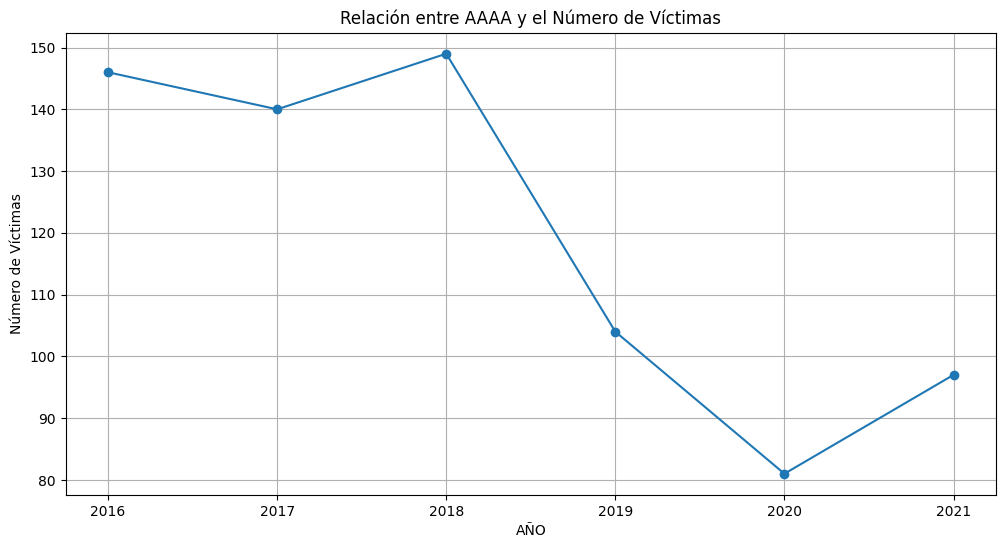

In [254]:
%matplotlib inline 

# Resto de tu código aquí

# Agrupa los datos por fecha y suma el número de víctimas en cada fecha
victimas_por_fecha = combinado.groupby('AAAA')['N_VICTIMAS'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.plot(victimas_por_fecha['AAAA'], victimas_por_fecha['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Relación entre AAAA y el Número de Víctimas')
plt.xlabel('AÑO')
plt.ylabel('Número de Víctimas')
plt.grid(True)

# Mostrar la gráfica
plt.show()


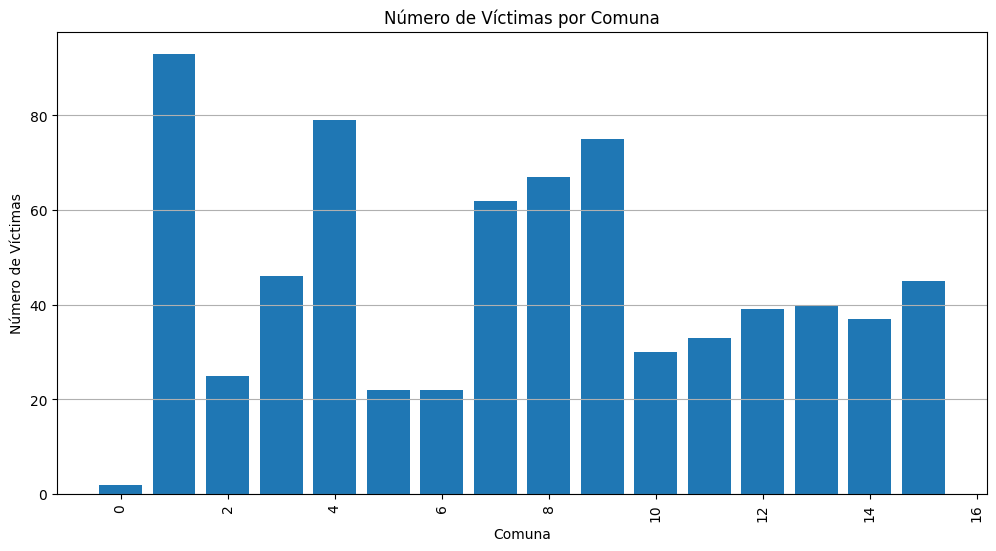

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'combinado' con las columnas necesarias

# Cuenta el número de víctimas en cada comuna
victimas_por_comuna = combinado.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_comuna['COMUNA'], victimas_por_comuna['N_VICTIMAS'])
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


In [256]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Crea un mapa de calor utilizando las coordenadas de longitud y latitud
m = folium.Map(location=[combinado['Latitud'].mean(), combinado['Longitud'].mean()], zoom_start=12)

# Convierte los datos de longitud y latitud en una lista de listas, excluyendo valores NaN
heat_data = [[row['Latitud'], row['Longitud']] for index, row in combinado.dropna(subset=['Latitud', 'Longitud']).iterrows()]

# Agrega el mapa de calor al mapa folium
HeatMap(heat_data).add_to(m)

# Muestra el mapa en el entorno interactivo
display(m)



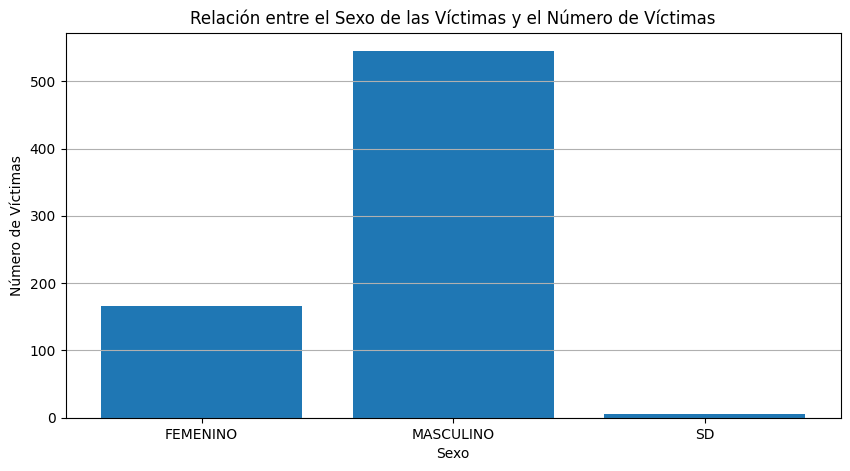

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'combinado' con las columnas 'VICTIMA' y 'SEXO'

# Agrupa los datos por sexo y suma el número de víctimas en cada categoría
victimas_por_sexo = combinado.groupby('SEXO')['VICTIMA'].count().reset_index()

# Crea la gráfica de barras
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la gráfica según tus preferencias
plt.bar(victimas_por_sexo['SEXO'], victimas_por_sexo['VICTIMA'])
plt.title('Relación entre el Sexo de las Víctimas y el Número de Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()


Histograma de Edades

c:\Users\TOCALACTEOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\TOCALACTEOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


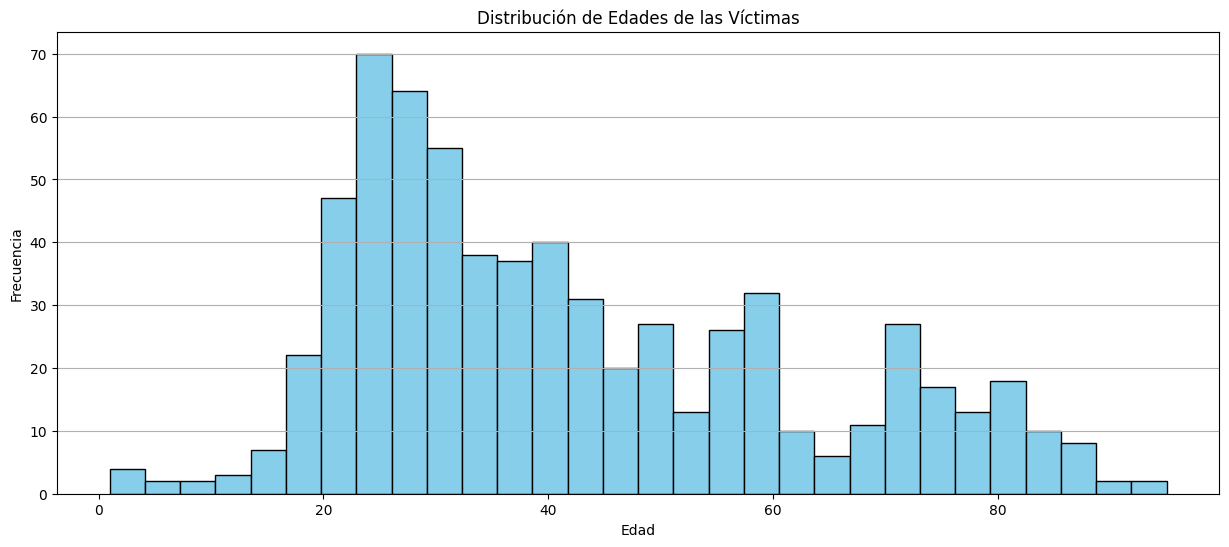

In [258]:
plt.figure(figsize=(15, 6))
plt.hist(combinado['EDAD'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


Diagrama de Barras por Tipo de Calle

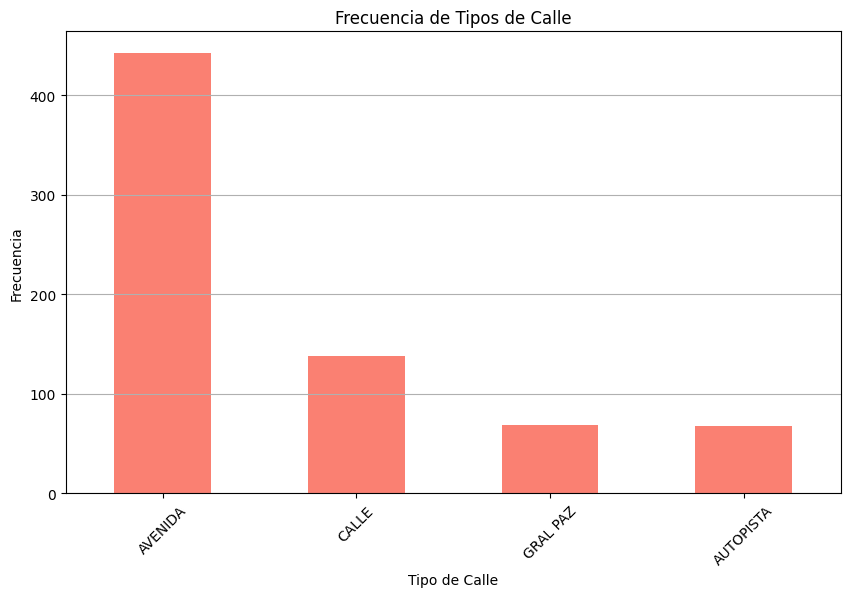

In [259]:
plt.figure(figsize=(10, 6))
combinado['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frecuencia de Tipos de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Diagrama de Barras Apiladas por Rol y Sexo:

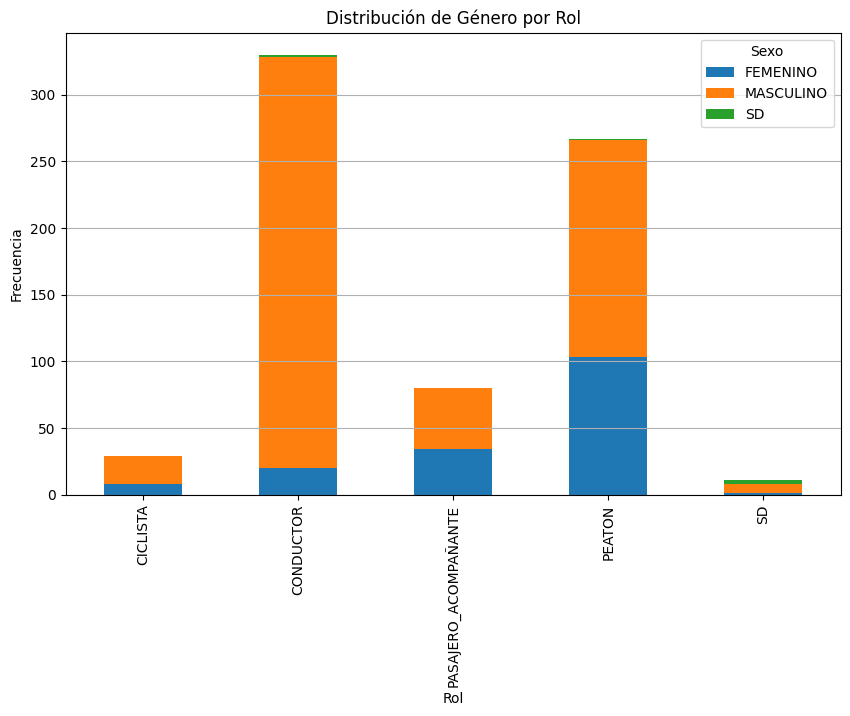

In [260]:
rol_sexo = combinado.groupby(['ROL', 'SEXO']).size().unstack()
rol_sexo.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.legend(title='Sexo')
plt.show()


Gráfico de Barras por Mes de Siniestros:

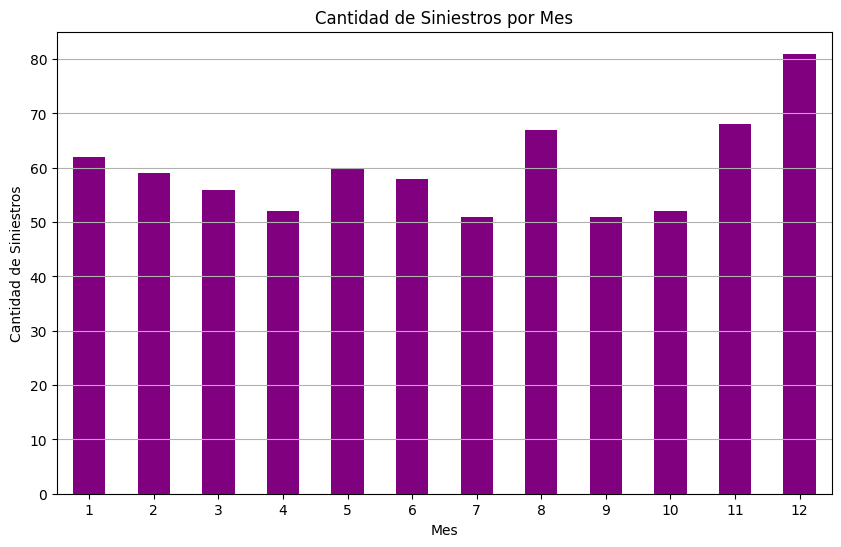

In [261]:
plt.figure(figsize=(10, 6))
combinado.groupby('MM')['ID'].count().plot(kind='bar', color='purple')
plt.title('Cantidad de Siniestros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Gráfico de Barras por Comuna

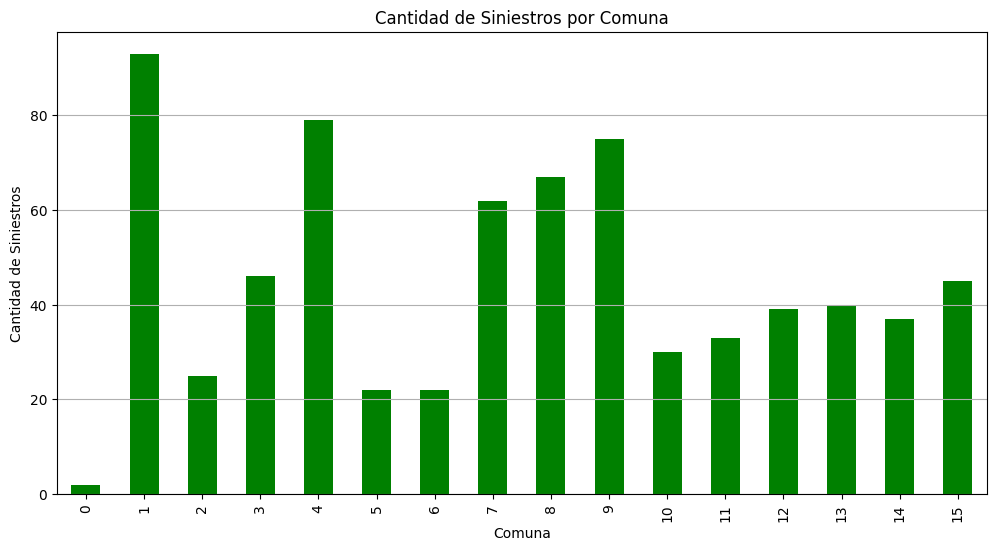

In [262]:
plt.figure(figsize=(12, 6))
combinado['COMUNA'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Cantidad de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.grid(axis='y')
plt.show()


Histograma de Edad de las Víctimas Fallecidas:

c:\Users\TOCALACTEOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\TOCALACTEOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


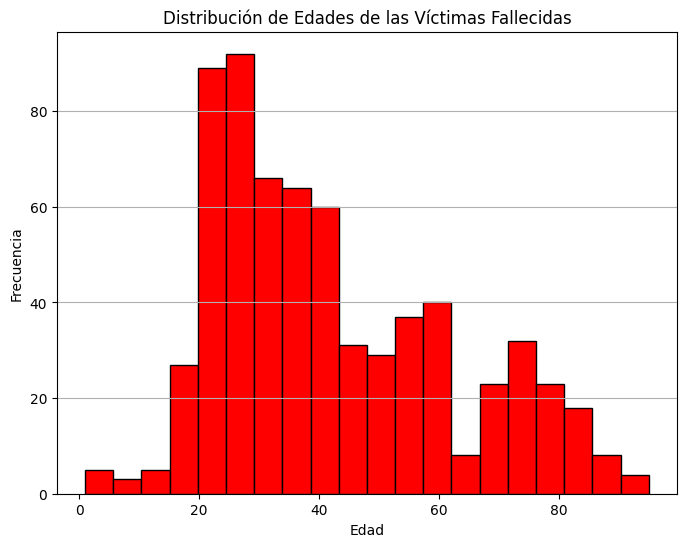

In [263]:
import matplotlib.pyplot as plt

# Filtra las filas con víctimas fallecidas
victimas_fallecidas = combinado['EDAD']

plt.figure(figsize=(8, 6))
plt.hist(victimas_fallecidas, bins=20, color='red', edgecolor='black')
plt.title('Distribución de Edades de las Víctimas Fallecidas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


In [264]:
combinado

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,1,1,2023-09-11 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00,1
1,2016-0002,1,2016-01-02,2016,1,2,2023-09-11 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00,1
2,2016-0003,1,2016-01-03,2016,1,3,2023-09-11 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00,1
3,2016-0004,1,2016-01-10,2016,1,10,2023-09-11 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,NaN,1
4,2016-0005,1,2016-01-21,2016,1,21,2023-09-11 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,2023-09-11 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00,2
713,2021-0094,1,2021-12-20,2021,12,20,2023-09-11 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00,2
714,2021-0095,1,2021-12-30,2021,12,30,2023-09-11 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00,2
715,2021-0096,1,2021-12-15,2021,12,15,2023-09-11 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00,2
